[source](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html)

In [1]:
# for working with datet times
from datetime import datetime
from dateutil import parser

In [2]:
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [3]:
date = parser.parse('4th of July, 2015')
date

datetime.datetime(2015, 7, 4, 0, 0)

In [8]:
date.strftime('%A') # strftime - to extract values from a datetime 

'Saturday'

In [10]:
# pytz for timezones
# datetime64 - needs input to be 2015-07-04

import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [11]:
date + np.arange(12) # add 12 days

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [ ]:
# can only encode a range of 2^64 - datetime64 (64-bit precision)
# time zone auto with local in computer
# goes down to nanoseconds

In [12]:
# date and times in pandas - allow working with datetime64 - coded as TimeStamps
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date


Timestamp('2015-07-04 00:00:00')

In [13]:
date.strftime('%A')

'Saturday'

In [14]:
date + pd.to_timedelta(np.arange(12), 'D') # numpy style vecorization

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [15]:
# use time as index
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [16]:
# index as normal
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [17]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

* time stamps = Timestamp type, with DatetimeIndex working like datetime and np.datetime64
* time Periods = Period, PeriodIndex
* time delta/durations = Timedelta, TimedeltaIndex

In [18]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates # for datetime index

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [19]:
# to create periods
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [20]:
# create a time delta
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [ ]:
# regular sequences
# pd.date_range()
# pd.period_range() for periods
# pd.timedelta_range() for time deltas

In [21]:
# default frequency is 1 day, accepts start and end dates 

pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [22]:
pd.date_range('2015-07-03', periods=8) # setting length

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [23]:
pd.date_range('2015-07-03', periods=8, freq='H') # specify by hour


DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [24]:
# create periods and time-deltas
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [25]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

Frequency codes see online source 
* for D, Week, Hour, T-minutes, Seconds
* adding s MS - indicates month start 
* can modify weeks too to indicate splitpoint 

In [26]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [27]:
# frequency by business day will skip weekends
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

In [28]:
# data reader specifically for finance data 
from pandas_datareader import data
goog = data.DataReader('GOOG', start='2004', end='2016', data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [29]:
goog = goog['Close']

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

<AxesSubplot:xlabel='Date'>

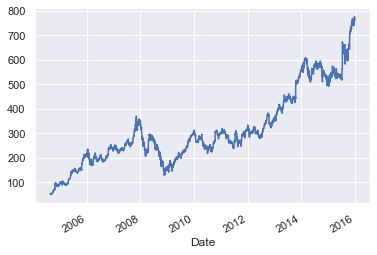

In [31]:
goog.plot()

**resampling and converting frequencies**
* resample() - dataaggregation
* asfreq() - dataselection 
* done to resample at a higher or lower frequency - more smoothing 

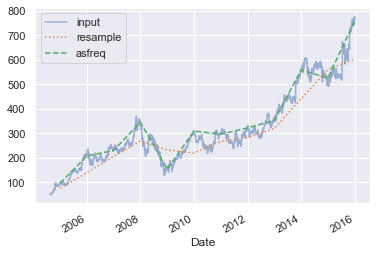

In [32]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

In [33]:
# resample - takes the average of previous year
# asfreq - value at the end of year (trailing)

In [34]:
# upsampling - resample and asfreq are similar
# resample has more options 
# upsampled points are left empty - and filled with NA

In [37]:
# when date is index

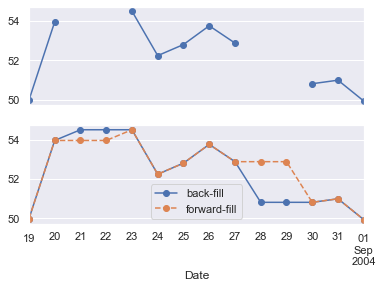

In [35]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o') # plotting daily

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

/var/folders/fm/m7sbfrtn37dcz2lvxhvj6q0m0000gn/T/ipykernel_67868/2393050688.py:12: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog.tshift(900).plot(ax=ax[2])


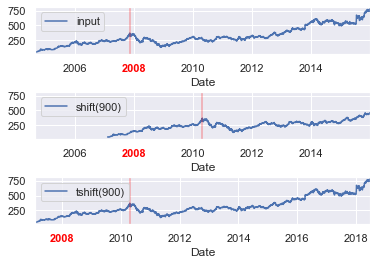

In [42]:
# Time Shifts
# shift() - shifts the data
# tshift() - shifts the index 

fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

plt.subplots_adjust(hspace=0.8)

/var/folders/fm/m7sbfrtn37dcz2lvxhvj6q0m0000gn/T/ipykernel_67868/1722361848.py:3: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ROI = 100 * (goog.tshift(-365) / goog - 1)


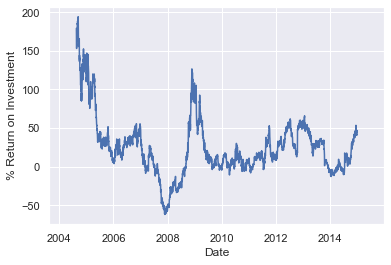

In [43]:
# done to compute differences over time 
# e.g. use shifted values to compute the one year return on investment for stock
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

Rolling windows 
* use rolling() attribute of Series and DF
* works similar to groupby

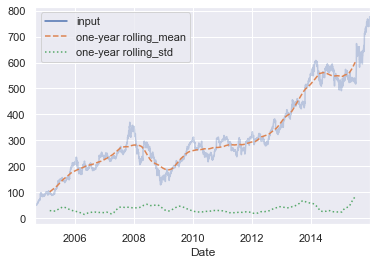

In [44]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

In [ ]:
# aggregate and apply can also be used as methods for custom rolling computations 

Commented code below demos how to use resampling, and data.index to get different granularity in data

In [ ]:
# data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True) # parse dates 
# data.head()
# when visualizing - e.g. in hours and too dense - do a resample with different frequency
# weekly = data.resample('W').sum() e.g. by week
# daily = data.resample('D').sum()
# can calculate rolling mean - daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
# larger window, and width set to 10 days - get better smoothing 
# daily.rolling(50, center=True,
            #   win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

# can use group by to see hourly average by day
# by_time = data.groupby(data.index.time).mean()
# hourly_ticks = 4 * 60 * 60 * np.arange(6)

# can use for seeing changed based on day of the week - passing different things through groupby 
# by_weekday = data.groupby(data.index.dayofweek).mean()
# by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
# by_weekday.plot(style=[':', '--', '-']);

# more granular - compound groupby - weekend and hourly trend 
# weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
# by_time = data.groupby([weekend, data.index.time]).mean()
# can plot different hourly for weekdays and weekends 
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(1, 2, figsize=(14, 5))
# by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
#                            xticks=hourly_ticks, style=[':', '--', '-'])
# by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
#                            xticks=hourly_ticks, style=[':', '--', '-']);

## Moving Average
* aim is to smooth - remove noise and better expose the signal
* simple and common type of smoothing used in time series analysis and forecasting
* a moving average requires specifiying window size (width) 
* can be centred or trailing

* assumes that observations are stationary - does not show obvious trends or seasonality 
* must do differencing 
* can be used for data prep, and feature engineering 

In [ ]:
# example of centred moving average
# center_ma(t) = mean(obs(t-1), obs(t), obs(t+1))
# removing trend and seasonal components from the time series
# often not used in forecasting because it requires future observations 

# trailing moving average - doesnn't require future observations
# trail_ma(t) = mean(obs(t-2), obs(t-1), obs(t))


In [51]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv', index_col='Date')

In [52]:
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


<AxesSubplot:xlabel='Date'>

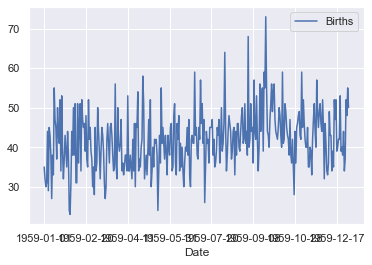

In [54]:
df.plot()

               Births
Date                 
1959-01-01        NaN
1959-01-02        NaN
1959-01-03  32.333333
1959-01-04  31.000000
1959-01-05  35.000000
1959-01-06  34.666667
1959-01-07  39.333333
1959-01-08  39.000000
1959-01-09  42.000000
1959-01-10  36.000000


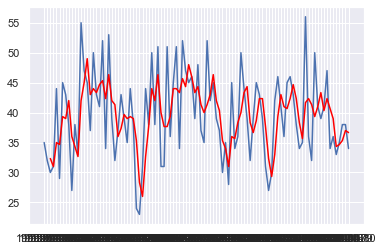

In [62]:
# rolling() to get moving average with a window of 3 days 
# Tail-rolling average transform
rolling = df.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
fig, ax = plt.subplots()
ax.plot(df[:100])
ax.plot(rolling_mean[:100], color='red', label='rolling_mean')
plt.show()

#### Moving average as feature engineering
* source of new information when modeling time series 
* moving average calculated and added as a new input feature to predict the next time step
* copy of series must be shifted by 1 - giving a lag of 1 
* if window size=3, must not shift series by 2 time steps - because moving average will need 2 previous and current 
* it will take 3 time steps before there's enough data for a moving average 

In [63]:
# including the moving average of previous 3 values as a new feature - and lag-1 input feature 
from pandas import DataFrame
from pandas import concat
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't-1', 't+1']
print(dataframe.head(10))

                 mean   t-1  t+1
Date                            
1959-01-01        NaN   NaN   35
1959-01-02        NaN  35.0   32
1959-01-03        NaN  32.0   30
1959-01-04        NaN  30.0   31
1959-01-05  32.333333  31.0   44
1959-01-06  31.000000  44.0   29
1959-01-07  35.000000  29.0   45
1959-01-08  34.666667  45.0   43
1959-01-09  39.333333  43.0   38
1959-01-10  39.000000  38.0   27


In [ ]:
# see first 3 throw rows must be discarded - from lack of data - no previous observations to predict the first observation 

**Moving Average as Prediction**
* using moving average in a walk-forward manner
* as new observations are made available - model updates the prediction for the next day 

predicted=32.333333, expected=31.000000
predicted=31.000000, expected=44.000000
predicted=35.000000, expected=29.000000
predicted=34.666667, expected=45.000000
predicted=39.333333, expected=43.000000
predicted=39.000000, expected=38.000000
predicted=42.000000, expected=27.000000
predicted=36.000000, expected=38.000000
predicted=34.333333, expected=33.000000
predicted=32.666667, expected=55.000000
predicted=42.000000, expected=47.000000
predicted=45.000000, expected=45.000000
predicted=49.000000, expected=37.000000
predicted=43.000000, expected=50.000000
predicted=44.000000, expected=43.000000
predicted=43.333333, expected=41.000000
predicted=44.666667, expected=52.000000
predicted=45.333333, expected=34.000000
predicted=42.333333, expected=53.000000
predicted=46.333333, expected=39.000000
predicted=42.000000, expected=32.000000
predicted=41.333333, expected=37.000000
predicted=36.000000, expected=43.000000
predicted=37.333333, expected=39.000000
predicted=39.666667, expected=35.000000


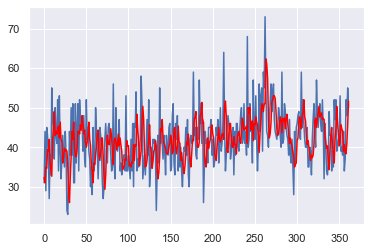

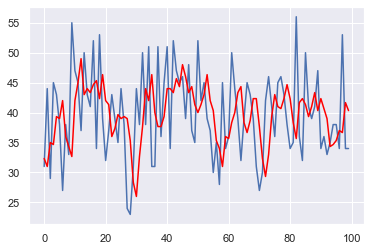

In [64]:
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv', header=0, index_col=0)
# prepare situation
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)]) # mean of the window 
	obs = test[t] # actual value 
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[0:100])
pyplot.plot(predictions[0:100], color='red')
pyplot.show()